# 0. Install Dependencies

In [ ]:
#Install stabe-baselines3 if not installed
!pip install 'stable-baselines3[extra]'

In [1]:
#Importing required dependencies
import os
import gym as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# 1. Testing if the environment is working

In [2]:
env_name = 'LunarLander-v2'
env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0)
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))
#env.close()

Episode:1 Score:-323.56688133988155
Episode:2 Score:-86.05601686193503
Episode:3 Score:-42.41916952346271
Episode:4 Score:-564.5231565265555
Episode:5 Score:-350.57409428262656


/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/gym/envs/box2d/lunar_lander.py:604: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("LunarLander-v2", render_mode="rgb_array")
  gym.logger.warn(


# 2. Training PPO
### Based on stablebaselines-3 official documentation, Gym official documentation, and Nicholas Renotte's RL course on Youtube

In [3]:
log_path = os.path.join('Training', 'Logs')

In [4]:
log_path

'Training/Logs'

In [5]:
#Instantiating the environment with the adversarial conditions
env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )

"""
Vectorizing the environment so that the neural network is fed with batches of vectors from game
episodes instead of one episode at a time
"""
env = DummyVecEnv([lambda: Monitor(env, log_path)])

"""
Instantiating the RL algorithm, with Multi layer perceptron as a function approximator.
Training metrics are saved to the log_path file: Logs
"""

model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [6]:
#Training the model for 2 Million timestep.
model.learn(total_timesteps=2000000)

2023-05-09 10:10:39.660586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Logging to Training/Logs/PPO_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.2     |
|    ep_rew_mean     | -289     |
| time/              |          |
|    fps             | 125      |
|    iterations      | 1        |
|    time_elapsed    | 16       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 86          |
|    ep_rew_mean          | -288        |
| time/                   |             |
|    fps                  | 217         |
|    iterations           | 2           |
|    time_elapsed         | 18          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007823668 |
|    clip_fraction        | 0.0116      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.00248    |

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -213        |
| time/                   |             |
|    fps                  | 491         |
|    iterations           | 11          |
|    time_elapsed         | 45          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.007993955 |
|    clip_fraction        | 0.0475      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | -0.00436    |
|    learning_rate        | 0.0003      |
|    loss                 | 319         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00641    |
|    value_loss           | 829         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 104   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 137         |
|    ep_rew_mean          | -123        |
| time/                   |             |
|    fps                  | 541         |
|    iterations           | 21          |
|    time_elapsed         | 79          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.005314246 |
|    clip_fraction        | 0.011       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.22        |
|    learning_rate        | 0.0003      |
|    loss                 | 167         |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00505    |
|    value_loss           | 433         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 141   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 199          |
|    ep_rew_mean          | -68.2        |
| time/                   |              |
|    fps                  | 562          |
|    iterations           | 31           |
|    time_elapsed         | 112          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0061119744 |
|    clip_fraction        | 0.0468       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.933       |
|    explained_variance   | 0.732        |
|    learning_rate        | 0.0003       |
|    loss                 | 77.5         |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00695     |
|    value_loss           | 153          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 266          |
|    ep_rew_mean          | -52.1        |
| time/                   |              |
|    fps                  | 543          |
|    iterations           | 41           |
|    time_elapsed         | 154          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0075106556 |
|    clip_fraction        | 0.074        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.874       |
|    explained_variance   | 0.789        |
|    learning_rate        | 0.0003       |
|    loss                 | 52.7         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.0101      |
|    value_loss           | 97.2         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 375          |
|    ep_rew_mean          | -28.9        |
| time/                   |              |
|    fps                  | 528          |
|    iterations           | 51           |
|    time_elapsed         | 197          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0061775586 |
|    clip_fraction        | 0.0546       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.809       |
|    explained_variance   | 0.714        |
|    learning_rate        | 0.0003       |
|    loss                 | 53.7         |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.00911     |
|    value_loss           | 144          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 379          |
|    ep_rew_mean          | -8.11        |
| time/                   |              |
|    fps                  | 540          |
|    iterations           | 61           |
|    time_elapsed         | 231          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0064525576 |
|    clip_fraction        | 0.0486       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.83        |
|    explained_variance   | 0.818        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.3         |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00494     |
|    value_loss           | 100          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329          |
|    ep_rew_mean          | 2.9          |
| time/                   |              |
|    fps                  | 549          |
|    iterations           | 71           |
|    time_elapsed         | 264          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0032221503 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.73        |
|    explained_variance   | 0.585        |
|    learning_rate        | 0.0003       |
|    loss                 | 113          |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.00349     |
|    value_loss           | 221          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358          |
|    ep_rew_mean          | 39.9         |
| time/                   |              |
|    fps                  | 546          |
|    iterations           | 81           |
|    time_elapsed         | 303          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0075807637 |
|    clip_fraction        | 0.0564       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.672       |
|    explained_variance   | 0.563        |
|    learning_rate        | 0.0003       |
|    loss                 | 135          |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.00722     |
|    value_loss           | 205          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 413         |
|    ep_rew_mean          | 71.7        |
| time/                   |             |
|    fps                  | 546         |
|    iterations           | 91          |
|    time_elapsed         | 341         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.004223422 |
|    clip_fraction        | 0.0238      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.75       |
|    explained_variance   | 0.661       |
|    learning_rate        | 0.0003      |
|    loss                 | 93.7        |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.00354    |
|    value_loss           | 195         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 414 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 366          |
|    ep_rew_mean          | 85.3         |
| time/                   |              |
|    fps                  | 551          |
|    iterations           | 101          |
|    time_elapsed         | 375          |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0061183316 |
|    clip_fraction        | 0.0644       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.651       |
|    explained_variance   | 0.677        |
|    learning_rate        | 0.0003       |
|    loss                 | 84.1         |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.0047      |
|    value_loss           | 232          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 345         |
|    ep_rew_mean          | 83.3        |
| time/                   |             |
|    fps                  | 554         |
|    iterations           | 111         |
|    time_elapsed         | 409         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.008847499 |
|    clip_fraction        | 0.073       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.577      |
|    explained_variance   | 0.557       |
|    learning_rate        | 0.0003      |
|    loss                 | 52.9        |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.00472    |
|    value_loss           | 218         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 357          |
|    ep_rew_mean          | 74.5         |
| time/                   |              |
|    fps                  | 557          |
|    iterations           | 121          |
|    time_elapsed         | 444          |
|    total_timesteps      | 247808       |
| train/                  |              |
|    approx_kl            | 0.0061524836 |
|    clip_fraction        | 0.0465       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.656       |
|    explained_variance   | 0.725        |
|    learning_rate        | 0.0003       |
|    loss                 | 81.6         |
|    n_updates            | 1200         |
|    policy_gradient_loss | -0.00415     |
|    value_loss           | 207          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 375          |
|    ep_rew_mean          | 65.9         |
| time/                   |              |
|    fps                  | 558          |
|    iterations           | 131          |
|    time_elapsed         | 480          |
|    total_timesteps      | 268288       |
| train/                  |              |
|    approx_kl            | 0.0061774896 |
|    clip_fraction        | 0.065        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.589       |
|    explained_variance   | 0.647        |
|    learning_rate        | 0.0003       |
|    loss                 | 52.2         |
|    n_updates            | 1300         |
|    policy_gradient_loss | -0.00805     |
|    value_loss           | 184          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 379         |
|    ep_rew_mean          | 82.4        |
| time/                   |             |
|    fps                  | 561         |
|    iterations           | 141         |
|    time_elapsed         | 514         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.004883609 |
|    clip_fraction        | 0.0385      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.623      |
|    explained_variance   | 0.734       |
|    learning_rate        | 0.0003      |
|    loss                 | 42.9        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.00369    |
|    value_loss           | 161         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 379   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 393         |
|    ep_rew_mean          | 105         |
| time/                   |             |
|    fps                  | 560         |
|    iterations           | 151         |
|    time_elapsed         | 552         |
|    total_timesteps      | 309248      |
| train/                  |             |
|    approx_kl            | 0.004192206 |
|    clip_fraction        | 0.0443      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.596      |
|    explained_variance   | 0.83        |
|    learning_rate        | 0.0003      |
|    loss                 | 27          |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.00308    |
|    value_loss           | 104         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 399 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 411         |
|    ep_rew_mean          | 114         |
| time/                   |             |
|    fps                  | 558         |
|    iterations           | 161         |
|    time_elapsed         | 590         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.008095771 |
|    clip_fraction        | 0.0639      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.607      |
|    explained_variance   | 0.744       |
|    learning_rate        | 0.0003      |
|    loss                 | 65.9        |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.00473    |
|    value_loss           | 132         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 412   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 362          |
|    ep_rew_mean          | 103          |
| time/                   |              |
|    fps                  | 556          |
|    iterations           | 171          |
|    time_elapsed         | 629          |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0058458718 |
|    clip_fraction        | 0.0607       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.582       |
|    explained_variance   | 0.744        |
|    learning_rate        | 0.0003       |
|    loss                 | 35           |
|    n_updates            | 1700         |
|    policy_gradient_loss | -0.00536     |
|    value_loss           | 157          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 367          |
|    ep_rew_mean          | 107          |
| time/                   |              |
|    fps                  | 550          |
|    iterations           | 181          |
|    time_elapsed         | 673          |
|    total_timesteps      | 370688       |
| train/                  |              |
|    approx_kl            | 0.0056073014 |
|    clip_fraction        | 0.0378       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.615       |
|    explained_variance   | 0.716        |
|    learning_rate        | 0.0003       |
|    loss                 | 80.2         |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.00472     |
|    value_loss           | 223          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 343          |
|    ep_rew_mean          | 89.2         |
| time/                   |              |
|    fps                  | 548          |
|    iterations           | 191          |
|    time_elapsed         | 713          |
|    total_timesteps      | 391168       |
| train/                  |              |
|    approx_kl            | 0.0034881923 |
|    clip_fraction        | 0.0388       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.595       |
|    explained_variance   | 0.706        |
|    learning_rate        | 0.0003       |
|    loss                 | 96.4         |
|    n_updates            | 1900         |
|    policy_gradient_loss | -0.00542     |
|    value_loss           | 260          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 329         |
|    ep_rew_mean          | 78.5        |
| time/                   |             |
|    fps                  | 546         |
|    iterations           | 201         |
|    time_elapsed         | 753         |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.008149875 |
|    clip_fraction        | 0.0432      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.625      |
|    explained_variance   | 0.714       |
|    learning_rate        | 0.0003      |
|    loss                 | 26.2        |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.000591   |
|    value_loss           | 133         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 332 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 325          |
|    ep_rew_mean          | 114          |
| time/                   |              |
|    fps                  | 542          |
|    iterations           | 211          |
|    time_elapsed         | 796          |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0043970575 |
|    clip_fraction        | 0.0367       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.49        |
|    explained_variance   | 0.718        |
|    learning_rate        | 0.0003       |
|    loss                 | 22.4         |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.0061      |
|    value_loss           | 175          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 366          |
|    ep_rew_mean          | 130          |
| time/                   |              |
|    fps                  | 539          |
|    iterations           | 221          |
|    time_elapsed         | 838          |
|    total_timesteps      | 452608       |
| train/                  |              |
|    approx_kl            | 0.0040957006 |
|    clip_fraction        | 0.0301       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.466       |
|    explained_variance   | 0.512        |
|    learning_rate        | 0.0003       |
|    loss                 | 46.3         |
|    n_updates            | 2200         |
|    policy_gradient_loss | -0.0021      |
|    value_loss           | 212          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 357          |
|    ep_rew_mean          | 100          |
| time/                   |              |
|    fps                  | 542          |
|    iterations           | 231          |
|    time_elapsed         | 872          |
|    total_timesteps      | 473088       |
| train/                  |              |
|    approx_kl            | 0.0070731738 |
|    clip_fraction        | 0.0539       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.59        |
|    explained_variance   | 0.694        |
|    learning_rate        | 0.0003       |
|    loss                 | 58.9         |
|    n_updates            | 2300         |
|    policy_gradient_loss | -0.00587     |
|    value_loss           | 158          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 325          |
|    ep_rew_mean          | 91           |
| time/                   |              |
|    fps                  | 543          |
|    iterations           | 241          |
|    time_elapsed         | 907          |
|    total_timesteps      | 493568       |
| train/                  |              |
|    approx_kl            | 0.0031476389 |
|    clip_fraction        | 0.0384       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.531       |
|    explained_variance   | 0.602        |
|    learning_rate        | 0.0003       |
|    loss                 | 112          |
|    n_updates            | 2400         |
|    policy_gradient_loss | -0.00219     |
|    value_loss           | 242          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 349          |
|    ep_rew_mean          | 118          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 251          |
|    time_elapsed         | 949          |
|    total_timesteps      | 514048       |
| train/                  |              |
|    approx_kl            | 0.0050768144 |
|    clip_fraction        | 0.0274       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.429       |
|    explained_variance   | 0.882        |
|    learning_rate        | 0.0003       |
|    loss                 | 20.9         |
|    n_updates            | 2500         |
|    policy_gradient_loss | -0.00195     |
|    value_loss           | 71.9         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 384          |
|    ep_rew_mean          | 136          |
| time/                   |              |
|    fps                  | 538          |
|    iterations           | 261          |
|    time_elapsed         | 993          |
|    total_timesteps      | 534528       |
| train/                  |              |
|    approx_kl            | 0.0037381998 |
|    clip_fraction        | 0.0398       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.486       |
|    explained_variance   | 0.589        |
|    learning_rate        | 0.0003       |
|    loss                 | 24.8         |
|    n_updates            | 2600         |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 156          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 369          |
|    ep_rew_mean          | 120          |
| time/                   |              |
|    fps                  | 537          |
|    iterations           | 271          |
|    time_elapsed         | 1032         |
|    total_timesteps      | 555008       |
| train/                  |              |
|    approx_kl            | 0.0035976665 |
|    clip_fraction        | 0.0417       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.576        |
|    learning_rate        | 0.0003       |
|    loss                 | 44.7         |
|    n_updates            | 2700         |
|    policy_gradient_loss | -0.00414     |
|    value_loss           | 131          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 311          |
|    ep_rew_mean          | 97.5         |
| time/                   |              |
|    fps                  | 540          |
|    iterations           | 281          |
|    time_elapsed         | 1065         |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0057320474 |
|    clip_fraction        | 0.0729       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.581       |
|    explained_variance   | 0.757        |
|    learning_rate        | 0.0003       |
|    loss                 | 23.9         |
|    n_updates            | 2800         |
|    policy_gradient_loss | -0.00555     |
|    value_loss           | 176          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 335          |
|    ep_rew_mean          | 101          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 291          |
|    time_elapsed         | 1100         |
|    total_timesteps      | 595968       |
| train/                  |              |
|    approx_kl            | 0.0051896116 |
|    clip_fraction        | 0.03         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.501       |
|    explained_variance   | 0.748        |
|    learning_rate        | 0.0003       |
|    loss                 | 14.7         |
|    n_updates            | 2900         |
|    policy_gradient_loss | -0.00282     |
|    value_loss           | 92.8         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 378         |
|    ep_rew_mean          | 123         |
| time/                   |             |
|    fps                  | 542         |
|    iterations           | 301         |
|    time_elapsed         | 1136        |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.004308176 |
|    clip_fraction        | 0.0424      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.513      |
|    explained_variance   | 0.75        |
|    learning_rate        | 0.0003      |
|    loss                 | 12.2        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.000244   |
|    value_loss           | 70.1        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 377 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 395         |
|    ep_rew_mean          | 132         |
| time/                   |             |
|    fps                  | 542         |
|    iterations           | 311         |
|    time_elapsed         | 1174        |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.008906695 |
|    clip_fraction        | 0.0891      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.549      |
|    explained_variance   | 0.65        |
|    learning_rate        | 0.0003      |
|    loss                 | 26.4        |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.00522    |
|    value_loss           | 199         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 399 

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 399        |
|    ep_rew_mean          | 129        |
| time/                   |            |
|    fps                  | 542        |
|    iterations           | 321        |
|    time_elapsed         | 1212       |
|    total_timesteps      | 657408     |
| train/                  |            |
|    approx_kl            | 0.00465973 |
|    clip_fraction        | 0.0243     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.491     |
|    explained_variance   | 0.832      |
|    learning_rate        | 0.0003     |
|    loss                 | 125        |
|    n_updates            | 3200       |
|    policy_gradient_loss | -0.00141   |
|    value_loss           | 144        |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 391         |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 381         |
|    ep_rew_mean          | 147         |
| time/                   |             |
|    fps                  | 541         |
|    iterations           | 331         |
|    time_elapsed         | 1250        |
|    total_timesteps      | 677888      |
| train/                  |             |
|    approx_kl            | 0.005694765 |
|    clip_fraction        | 0.0647      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.537      |
|    explained_variance   | 0.776       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.5        |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.00176    |
|    value_loss           | 127         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 381 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 386          |
|    ep_rew_mean          | 158          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 341          |
|    time_elapsed         | 1289         |
|    total_timesteps      | 698368       |
| train/                  |              |
|    approx_kl            | 0.0025658947 |
|    clip_fraction        | 0.0498       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.508       |
|    explained_variance   | 0.617        |
|    learning_rate        | 0.0003       |
|    loss                 | 44.2         |
|    n_updates            | 3400         |
|    policy_gradient_loss | -0.00205     |
|    value_loss           | 189          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 389          |
|    ep_rew_mean          | 125          |
| time/                   |              |
|    fps                  | 540          |
|    iterations           | 351          |
|    time_elapsed         | 1329         |
|    total_timesteps      | 718848       |
| train/                  |              |
|    approx_kl            | 0.0029819175 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.518       |
|    explained_variance   | 0.648        |
|    learning_rate        | 0.0003       |
|    loss                 | 68.3         |
|    n_updates            | 3500         |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 200          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 360          |
|    ep_rew_mean          | 95.6         |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 361          |
|    time_elapsed         | 1364         |
|    total_timesteps      | 739328       |
| train/                  |              |
|    approx_kl            | 0.0048142397 |
|    clip_fraction        | 0.0425       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.493       |
|    explained_variance   | 0.697        |
|    learning_rate        | 0.0003       |
|    loss                 | 64.5         |
|    n_updates            | 3600         |
|    policy_gradient_loss | -0.00282     |
|    value_loss           | 243          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 335        |
|    ep_rew_mean          | 126        |
| time/                   |            |
|    fps                  | 542        |
|    iterations           | 371        |
|    time_elapsed         | 1401       |
|    total_timesteps      | 759808     |
| train/                  |            |
|    approx_kl            | 0.00624334 |
|    clip_fraction        | 0.0541     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.553     |
|    explained_variance   | 0.873      |
|    learning_rate        | 0.0003     |
|    loss                 | 14         |
|    n_updates            | 3700       |
|    policy_gradient_loss | -0.00391   |
|    value_loss           | 54.6       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 338         |
|    ep_rew_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 377          |
|    ep_rew_mean          | 161          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 381          |
|    time_elapsed         | 1440         |
|    total_timesteps      | 780288       |
| train/                  |              |
|    approx_kl            | 0.0074524377 |
|    clip_fraction        | 0.0617       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.561       |
|    explained_variance   | 0.843        |
|    learning_rate        | 0.0003       |
|    loss                 | 31.2         |
|    n_updates            | 3800         |
|    policy_gradient_loss | -0.00182     |
|    value_loss           | 99           |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 375          |
|    ep_rew_mean          | 99.6         |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 391          |
|    time_elapsed         | 1477         |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0045661377 |
|    clip_fraction        | 0.0438       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.522       |
|    explained_variance   | 0.706        |
|    learning_rate        | 0.0003       |
|    loss                 | 50.6         |
|    n_updates            | 3900         |
|    policy_gradient_loss | -0.00297     |
|    value_loss           | 163          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 332         |
|    ep_rew_mean          | 74.6        |
| time/                   |             |
|    fps                  | 541         |
|    iterations           | 401         |
|    time_elapsed         | 1517        |
|    total_timesteps      | 821248      |
| train/                  |             |
|    approx_kl            | 0.004589913 |
|    clip_fraction        | 0.0466      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.456      |
|    explained_variance   | 0.609       |
|    learning_rate        | 0.0003      |
|    loss                 | 43.9        |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.00279    |
|    value_loss           | 105         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 332   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 306         |
|    ep_rew_mean          | 82.2        |
| time/                   |             |
|    fps                  | 541         |
|    iterations           | 411         |
|    time_elapsed         | 1553        |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.013817955 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.555      |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | 33.5        |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.00591    |
|    value_loss           | 52.2        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 316 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 346         |
|    ep_rew_mean          | 109         |
| time/                   |             |
|    fps                  | 542         |
|    iterations           | 421         |
|    time_elapsed         | 1589        |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.003545598 |
|    clip_fraction        | 0.0484      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.544      |
|    explained_variance   | 0.724       |
|    learning_rate        | 0.0003      |
|    loss                 | 239         |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.000496   |
|    value_loss           | 173         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 341 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 338         |
|    ep_rew_mean          | 124         |
| time/                   |             |
|    fps                  | 541         |
|    iterations           | 431         |
|    time_elapsed         | 1630        |
|    total_timesteps      | 882688      |
| train/                  |             |
|    approx_kl            | 0.004089335 |
|    clip_fraction        | 0.042       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.451      |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.0003      |
|    loss                 | 89.5        |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.00436    |
|    value_loss           | 165         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 335 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 313         |
|    ep_rew_mean          | 105         |
| time/                   |             |
|    fps                  | 543         |
|    iterations           | 441         |
|    time_elapsed         | 1662        |
|    total_timesteps      | 903168      |
| train/                  |             |
|    approx_kl            | 0.004829469 |
|    clip_fraction        | 0.0293      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.501      |
|    explained_variance   | 0.737       |
|    learning_rate        | 0.0003      |
|    loss                 | 55.1        |
|    n_updates            | 4400        |
|    policy_gradient_loss | -0.00372    |
|    value_loss           | 214         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 312 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 336         |
|    ep_rew_mean          | 99.2        |
| time/                   |             |
|    fps                  | 544         |
|    iterations           | 451         |
|    time_elapsed         | 1695        |
|    total_timesteps      | 923648      |
| train/                  |             |
|    approx_kl            | 0.021301802 |
|    clip_fraction        | 0.0688      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.61       |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.81        |
|    n_updates            | 4500        |
|    policy_gradient_loss | -0.00728    |
|    value_loss           | 27.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 347   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 356          |
|    ep_rew_mean          | 129          |
| time/                   |              |
|    fps                  | 546          |
|    iterations           | 461          |
|    time_elapsed         | 1728         |
|    total_timesteps      | 944128       |
| train/                  |              |
|    approx_kl            | 0.0050171204 |
|    clip_fraction        | 0.0488       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.726        |
|    learning_rate        | 0.0003       |
|    loss                 | 82.4         |
|    n_updates            | 4600         |
|    policy_gradient_loss | -0.00357     |
|    value_loss           | 171          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 360         |
|    ep_rew_mean          | 157         |
| time/                   |             |
|    fps                  | 546         |
|    iterations           | 471         |
|    time_elapsed         | 1765        |
|    total_timesteps      | 964608      |
| train/                  |             |
|    approx_kl            | 0.008001083 |
|    clip_fraction        | 0.0684      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.524      |
|    explained_variance   | 0.719       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.17        |
|    n_updates            | 4700        |
|    policy_gradient_loss | -0.00129    |
|    value_loss           | 38          |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 364 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 399         |
|    ep_rew_mean          | 156         |
| time/                   |             |
|    fps                  | 546         |
|    iterations           | 481         |
|    time_elapsed         | 1803        |
|    total_timesteps      | 985088      |
| train/                  |             |
|    approx_kl            | 0.003917618 |
|    clip_fraction        | 0.0545      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.485      |
|    explained_variance   | 0.676       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.88        |
|    n_updates            | 4800        |
|    policy_gradient_loss | -0.000981   |
|    value_loss           | 53          |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 393   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 359          |
|    ep_rew_mean          | 146          |
| time/                   |              |
|    fps                  | 546          |
|    iterations           | 491          |
|    time_elapsed         | 1839         |
|    total_timesteps      | 1005568      |
| train/                  |              |
|    approx_kl            | 0.0067850235 |
|    clip_fraction        | 0.0442       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.492       |
|    explained_variance   | 0.521        |
|    learning_rate        | 0.0003       |
|    loss                 | 9.64         |
|    n_updates            | 4900         |
|    policy_gradient_loss | -0.00455     |
|    value_loss           | 113          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 372          |
|    ep_rew_mean          | 156          |
| time/                   |              |
|    fps                  | 546          |
|    iterations           | 501          |
|    time_elapsed         | 1877         |
|    total_timesteps      | 1026048      |
| train/                  |              |
|    approx_kl            | 0.0035555814 |
|    clip_fraction        | 0.0511       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.493       |
|    explained_variance   | 0.856        |
|    learning_rate        | 0.0003       |
|    loss                 | 18.2         |
|    n_updates            | 5000         |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 47.1         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 415         |
|    ep_rew_mean          | 165         |
| time/                   |             |
|    fps                  | 545         |
|    iterations           | 511         |
|    time_elapsed         | 1917        |
|    total_timesteps      | 1046528     |
| train/                  |             |
|    approx_kl            | 0.008524264 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.463      |
|    explained_variance   | 0.652       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.7        |
|    n_updates            | 5100        |
|    policy_gradient_loss | -0.0042     |
|    value_loss           | 118         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 426 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 392          |
|    ep_rew_mean          | 149          |
| time/                   |              |
|    fps                  | 544          |
|    iterations           | 521          |
|    time_elapsed         | 1958         |
|    total_timesteps      | 1067008      |
| train/                  |              |
|    approx_kl            | 0.0045591323 |
|    clip_fraction        | 0.0491       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.397       |
|    explained_variance   | 0.666        |
|    learning_rate        | 0.0003       |
|    loss                 | 66.9         |
|    n_updates            | 5200         |
|    policy_gradient_loss | -0.00285     |
|    value_loss           | 175          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 331          |
|    ep_rew_mean          | 137          |
| time/                   |              |
|    fps                  | 545          |
|    iterations           | 531          |
|    time_elapsed         | 1993         |
|    total_timesteps      | 1087488      |
| train/                  |              |
|    approx_kl            | 0.0068329517 |
|    clip_fraction        | 0.064        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.461       |
|    explained_variance   | 0.815        |
|    learning_rate        | 0.0003       |
|    loss                 | 64.7         |
|    n_updates            | 5300         |
|    policy_gradient_loss | -0.00343     |
|    value_loss           | 97.1         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 366          |
|    ep_rew_mean          | 159          |
| time/                   |              |
|    fps                  | 544          |
|    iterations           | 541          |
|    time_elapsed         | 2036         |
|    total_timesteps      | 1107968      |
| train/                  |              |
|    approx_kl            | 0.0034911882 |
|    clip_fraction        | 0.0384       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.384       |
|    explained_variance   | 0.775        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.55         |
|    n_updates            | 5400         |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 37.9         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 367         |
|    ep_rew_mean          | 148         |
| time/                   |             |
|    fps                  | 543         |
|    iterations           | 551         |
|    time_elapsed         | 2076        |
|    total_timesteps      | 1128448     |
| train/                  |             |
|    approx_kl            | 0.011876628 |
|    clip_fraction        | 0.071       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.483      |
|    explained_variance   | 0.685       |
|    learning_rate        | 0.0003      |
|    loss                 | 126         |
|    n_updates            | 5500        |
|    policy_gradient_loss | -0.00266    |
|    value_loss           | 59.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 364   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 378          |
|    ep_rew_mean          | 144          |
| time/                   |              |
|    fps                  | 542          |
|    iterations           | 561          |
|    time_elapsed         | 2118         |
|    total_timesteps      | 1148928      |
| train/                  |              |
|    approx_kl            | 0.0057637105 |
|    clip_fraction        | 0.0376       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.472       |
|    explained_variance   | 0.518        |
|    learning_rate        | 0.0003       |
|    loss                 | 64.4         |
|    n_updates            | 5600         |
|    policy_gradient_loss | -0.00229     |
|    value_loss           | 184          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 338         |
|    ep_rew_mean          | 148         |
| time/                   |             |
|    fps                  | 542         |
|    iterations           | 571         |
|    time_elapsed         | 2155        |
|    total_timesteps      | 1169408     |
| train/                  |             |
|    approx_kl            | 0.003974843 |
|    clip_fraction        | 0.0448      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.471      |
|    explained_variance   | 0.488       |
|    learning_rate        | 0.0003      |
|    loss                 | 66.1        |
|    n_updates            | 5700        |
|    policy_gradient_loss | -0.00219    |
|    value_loss           | 237         |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 335     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329          |
|    ep_rew_mean          | 142          |
| time/                   |              |
|    fps                  | 542          |
|    iterations           | 581          |
|    time_elapsed         | 2194         |
|    total_timesteps      | 1189888      |
| train/                  |              |
|    approx_kl            | 0.0035472442 |
|    clip_fraction        | 0.058        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.533       |
|    explained_variance   | 0.691        |
|    learning_rate        | 0.0003       |
|    loss                 | 11.7         |
|    n_updates            | 5800         |
|    policy_gradient_loss | 0.000229     |
|    value_loss           | 134          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329          |
|    ep_rew_mean          | 152          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 591          |
|    time_elapsed         | 2233         |
|    total_timesteps      | 1210368      |
| train/                  |              |
|    approx_kl            | 0.0056496323 |
|    clip_fraction        | 0.0521       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.46        |
|    explained_variance   | 0.821        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.1         |
|    n_updates            | 5900         |
|    policy_gradient_loss | -0.00463     |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 391          |
|    ep_rew_mean          | 159          |
| time/                   |              |
|    fps                  | 537          |
|    iterations           | 601          |
|    time_elapsed         | 2288         |
|    total_timesteps      | 1230848      |
| train/                  |              |
|    approx_kl            | 0.0038054998 |
|    clip_fraction        | 0.0385       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.453       |
|    explained_variance   | 0.726        |
|    learning_rate        | 0.0003       |
|    loss                 | 22.9         |
|    n_updates            | 6000         |
|    policy_gradient_loss | -0.00273     |
|    value_loss           | 96.6         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 416         |
|    ep_rew_mean          | 161         |
| time/                   |             |
|    fps                  | 535         |
|    iterations           | 611         |
|    time_elapsed         | 2336        |
|    total_timesteps      | 1251328     |
| train/                  |             |
|    approx_kl            | 0.008994372 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.896       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.75        |
|    n_updates            | 6100        |
|    policy_gradient_loss | -0.00163    |
|    value_loss           | 32          |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 417 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 366          |
|    ep_rew_mean          | 170          |
| time/                   |              |
|    fps                  | 535          |
|    iterations           | 621          |
|    time_elapsed         | 2373         |
|    total_timesteps      | 1271808      |
| train/                  |              |
|    approx_kl            | 0.0058490727 |
|    clip_fraction        | 0.0396       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.42        |
|    explained_variance   | 0.79         |
|    learning_rate        | 0.0003       |
|    loss                 | 19.7         |
|    n_updates            | 6200         |
|    policy_gradient_loss | -0.00421     |
|    value_loss           | 130          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329          |
|    ep_rew_mean          | 144          |
| time/                   |              |
|    fps                  | 536          |
|    iterations           | 631          |
|    time_elapsed         | 2407         |
|    total_timesteps      | 1292288      |
| train/                  |              |
|    approx_kl            | 0.0046320157 |
|    clip_fraction        | 0.041        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.459       |
|    explained_variance   | 0.692        |
|    learning_rate        | 0.0003       |
|    loss                 | 53.7         |
|    n_updates            | 6300         |
|    policy_gradient_loss | -0.00385     |
|    value_loss           | 176          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 353          |
|    ep_rew_mean          | 118          |
| time/                   |              |
|    fps                  | 537          |
|    iterations           | 641          |
|    time_elapsed         | 2441         |
|    total_timesteps      | 1312768      |
| train/                  |              |
|    approx_kl            | 0.0024001603 |
|    clip_fraction        | 0.0339       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.427       |
|    explained_variance   | 0.623        |
|    learning_rate        | 0.0003       |
|    loss                 | 185          |
|    n_updates            | 6400         |
|    policy_gradient_loss | -0.00269     |
|    value_loss           | 180          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 375         |
|    ep_rew_mean          | 139         |
| time/                   |             |
|    fps                  | 538         |
|    iterations           | 651         |
|    time_elapsed         | 2476        |
|    total_timesteps      | 1333248     |
| train/                  |             |
|    approx_kl            | 0.021702027 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.506      |
|    explained_variance   | 0.832       |
|    learning_rate        | 0.0003      |
|    loss                 | 49.1        |
|    n_updates            | 6500        |
|    policy_gradient_loss | 0.000563    |
|    value_loss           | 62.5        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 373 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 376          |
|    ep_rew_mean          | 164          |
| time/                   |              |
|    fps                  | 539          |
|    iterations           | 661          |
|    time_elapsed         | 2510         |
|    total_timesteps      | 1353728      |
| train/                  |              |
|    approx_kl            | 0.0075912736 |
|    clip_fraction        | 0.0542       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.444       |
|    explained_variance   | 0.694        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.73         |
|    n_updates            | 6600         |
|    policy_gradient_loss | -0.00436     |
|    value_loss           | 37.7         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 337         |
|    ep_rew_mean          | 160         |
| time/                   |             |
|    fps                  | 538         |
|    iterations           | 671         |
|    time_elapsed         | 2549        |
|    total_timesteps      | 1374208     |
| train/                  |             |
|    approx_kl            | 0.015733384 |
|    clip_fraction        | 0.0949      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.485      |
|    explained_variance   | 0.579       |
|    learning_rate        | 0.0003      |
|    loss                 | 15.4        |
|    n_updates            | 6700        |
|    policy_gradient_loss | -0.00198    |
|    value_loss           | 59.8        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 343 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 357         |
|    ep_rew_mean          | 153         |
| time/                   |             |
|    fps                  | 538         |
|    iterations           | 681         |
|    time_elapsed         | 2587        |
|    total_timesteps      | 1394688     |
| train/                  |             |
|    approx_kl            | 0.006228232 |
|    clip_fraction        | 0.0483      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.357      |
|    explained_variance   | 0.847       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.5        |
|    n_updates            | 6800        |
|    policy_gradient_loss | -0.00451    |
|    value_loss           | 81.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 351   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 382         |
|    ep_rew_mean          | 170         |
| time/                   |             |
|    fps                  | 537         |
|    iterations           | 691         |
|    time_elapsed         | 2631        |
|    total_timesteps      | 1415168     |
| train/                  |             |
|    approx_kl            | 0.014618314 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.591      |
|    explained_variance   | 0.123       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.7         |
|    n_updates            | 6900        |
|    policy_gradient_loss | -0.00582    |
|    value_loss           | 67.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 385   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 383         |
|    ep_rew_mean          | 158         |
| time/                   |             |
|    fps                  | 536         |
|    iterations           | 701         |
|    time_elapsed         | 2677        |
|    total_timesteps      | 1435648     |
| train/                  |             |
|    approx_kl            | 0.006837918 |
|    clip_fraction        | 0.0816      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.448      |
|    explained_variance   | 0.623       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.5        |
|    n_updates            | 7000        |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 44.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 385 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 355         |
|    ep_rew_mean          | 145         |
| time/                   |             |
|    fps                  | 536         |
|    iterations           | 711         |
|    time_elapsed         | 2713        |
|    total_timesteps      | 1456128     |
| train/                  |             |
|    approx_kl            | 0.009992205 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.555      |
|    explained_variance   | 0.373       |
|    learning_rate        | 0.0003      |
|    loss                 | 18.4        |
|    n_updates            | 7100        |
|    policy_gradient_loss | -0.00192    |
|    value_loss           | 190         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 344   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 358         |
|    ep_rew_mean          | 150         |
| time/                   |             |
|    fps                  | 537         |
|    iterations           | 721         |
|    time_elapsed         | 2747        |
|    total_timesteps      | 1476608     |
| train/                  |             |
|    approx_kl            | 0.016170215 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.603      |
|    explained_variance   | 0.639       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.18        |
|    n_updates            | 7200        |
|    policy_gradient_loss | -0.00708    |
|    value_loss           | 45.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 360   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 374        |
|    ep_rew_mean          | 155        |
| time/                   |            |
|    fps                  | 538        |
|    iterations           | 731        |
|    time_elapsed         | 2781       |
|    total_timesteps      | 1497088    |
| train/                  |            |
|    approx_kl            | 0.00577101 |
|    clip_fraction        | 0.0596     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.46      |
|    explained_variance   | 0.872      |
|    learning_rate        | 0.0003     |
|    loss                 | 11.3       |
|    n_updates            | 7300       |
|    policy_gradient_loss | -0.0021    |
|    value_loss           | 55         |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 358         |
|    ep_rew_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 364          |
|    ep_rew_mean          | 168          |
| time/                   |              |
|    fps                  | 539          |
|    iterations           | 741          |
|    time_elapsed         | 2814         |
|    total_timesteps      | 1517568      |
| train/                  |              |
|    approx_kl            | 0.0048154714 |
|    clip_fraction        | 0.0437       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.434       |
|    explained_variance   | 0.626        |
|    learning_rate        | 0.0003       |
|    loss                 | 9.52         |
|    n_updates            | 7400         |
|    policy_gradient_loss | -0.0033      |
|    value_loss           | 83.6         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 377        |
|    ep_rew_mean          | 159        |
| time/                   |            |
|    fps                  | 539        |
|    iterations           | 751        |
|    time_elapsed         | 2848       |
|    total_timesteps      | 1538048    |
| train/                  |            |
|    approx_kl            | 0.00565217 |
|    clip_fraction        | 0.0575     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.513     |
|    explained_variance   | 0.55       |
|    learning_rate        | 0.0003     |
|    loss                 | 6.68       |
|    n_updates            | 7500       |
|    policy_gradient_loss | -0.00243   |
|    value_loss           | 42.7       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 382         |
|    ep_rew_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 329          |
|    ep_rew_mean          | 147          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 761          |
|    time_elapsed         | 2880         |
|    total_timesteps      | 1558528      |
| train/                  |              |
|    approx_kl            | 0.0031333296 |
|    clip_fraction        | 0.0439       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.302       |
|    explained_variance   | 0.605        |
|    learning_rate        | 0.0003       |
|    loss                 | 48.7         |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.000727    |
|    value_loss           | 116          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 313          |
|    ep_rew_mean          | 162          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 771          |
|    time_elapsed         | 2913         |
|    total_timesteps      | 1579008      |
| train/                  |              |
|    approx_kl            | 0.0032253324 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.345       |
|    explained_variance   | 0.558        |
|    learning_rate        | 0.0003       |
|    loss                 | 134          |
|    n_updates            | 7700         |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 216          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 365          |
|    ep_rew_mean          | 166          |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 781          |
|    time_elapsed         | 2951         |
|    total_timesteps      | 1599488      |
| train/                  |              |
|    approx_kl            | 0.0029297546 |
|    clip_fraction        | 0.0393       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.523        |
|    learning_rate        | 0.0003       |
|    loss                 | 48.8         |
|    n_updates            | 7800         |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 131          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 418         |
|    ep_rew_mean          | 169         |
| time/                   |             |
|    fps                  | 542         |
|    iterations           | 791         |
|    time_elapsed         | 2987        |
|    total_timesteps      | 1619968     |
| train/                  |             |
|    approx_kl            | 0.010484887 |
|    clip_fraction        | 0.0716      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.568      |
|    explained_variance   | 0.856       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.93        |
|    n_updates            | 7900        |
|    policy_gradient_loss | 0.00193     |
|    value_loss           | 19.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 429   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 442        |
|    ep_rew_mean          | 168        |
| time/                   |            |
|    fps                  | 542        |
|    iterations           | 801        |
|    time_elapsed         | 3023       |
|    total_timesteps      | 1640448    |
| train/                  |            |
|    approx_kl            | 0.01623642 |
|    clip_fraction        | 0.129      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.595     |
|    explained_variance   | 0.878      |
|    learning_rate        | 0.0003     |
|    loss                 | 3          |
|    n_updates            | 8000       |
|    policy_gradient_loss | -0.00303   |
|    value_loss           | 30.7       |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 445          |
|    ep_re

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 405         |
|    ep_rew_mean          | 161         |
| time/                   |             |
|    fps                  | 540         |
|    iterations           | 811         |
|    time_elapsed         | 3074        |
|    total_timesteps      | 1660928     |
| train/                  |             |
|    approx_kl            | 0.009139396 |
|    clip_fraction        | 0.0457      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.444      |
|    explained_variance   | 0.83        |
|    learning_rate        | 0.0003      |
|    loss                 | 22.4        |
|    n_updates            | 8100        |
|    policy_gradient_loss | -0.00268    |
|    value_loss           | 41.4        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 405 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 378         |
|    ep_rew_mean          | 144         |
| time/                   |             |
|    fps                  | 538         |
|    iterations           | 821         |
|    time_elapsed         | 3119        |
|    total_timesteps      | 1681408     |
| train/                  |             |
|    approx_kl            | 0.004185157 |
|    clip_fraction        | 0.0303      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.444      |
|    explained_variance   | 0.642       |
|    learning_rate        | 0.0003      |
|    loss                 | 38.4        |
|    n_updates            | 8200        |
|    policy_gradient_loss | -0.00124    |
|    value_loss           | 68.8        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 381 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 345          |
|    ep_rew_mean          | 182          |
| time/                   |              |
|    fps                  | 538          |
|    iterations           | 831          |
|    time_elapsed         | 3161         |
|    total_timesteps      | 1701888      |
| train/                  |              |
|    approx_kl            | 0.0026202847 |
|    clip_fraction        | 0.043        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.738        |
|    learning_rate        | 0.0003       |
|    loss                 | 35.6         |
|    n_updates            | 8300         |
|    policy_gradient_loss | -0.00345     |
|    value_loss           | 77.1         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 359         |
|    ep_rew_mean          | 188         |
| time/                   |             |
|    fps                  | 536         |
|    iterations           | 841         |
|    time_elapsed         | 3207        |
|    total_timesteps      | 1722368     |
| train/                  |             |
|    approx_kl            | 0.004209226 |
|    clip_fraction        | 0.0335      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.348      |
|    explained_variance   | 0.877       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.6        |
|    n_updates            | 8400        |
|    policy_gradient_loss | -0.00126    |
|    value_loss           | 39.4        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 357 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 392          |
|    ep_rew_mean          | 168          |
| time/                   |              |
|    fps                  | 536          |
|    iterations           | 851          |
|    time_elapsed         | 3251         |
|    total_timesteps      | 1742848      |
| train/                  |              |
|    approx_kl            | 0.0055656442 |
|    clip_fraction        | 0.0436       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.448       |
|    explained_variance   | 0.643        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.89         |
|    n_updates            | 8500         |
|    policy_gradient_loss | -0.00221     |
|    value_loss           | 119          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 346         |
|    ep_rew_mean          | 172         |
| time/                   |             |
|    fps                  | 535         |
|    iterations           | 861         |
|    time_elapsed         | 3295        |
|    total_timesteps      | 1763328     |
| train/                  |             |
|    approx_kl            | 0.003982063 |
|    clip_fraction        | 0.0322      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.308      |
|    explained_variance   | 0.659       |
|    learning_rate        | 0.0003      |
|    loss                 | 29.9        |
|    n_updates            | 8600        |
|    policy_gradient_loss | -0.0016     |
|    value_loss           | 104         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 340 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 380          |
|    ep_rew_mean          | 178          |
| time/                   |              |
|    fps                  | 533          |
|    iterations           | 871          |
|    time_elapsed         | 3342         |
|    total_timesteps      | 1783808      |
| train/                  |              |
|    approx_kl            | 0.0059301625 |
|    clip_fraction        | 0.0477       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.474       |
|    explained_variance   | 0.81         |
|    learning_rate        | 0.0003       |
|    loss                 | 13           |
|    n_updates            | 8700         |
|    policy_gradient_loss | -0.00369     |
|    value_loss           | 29.8         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 398         |
|    ep_rew_mean          | 186         |
| time/                   |             |
|    fps                  | 532         |
|    iterations           | 881         |
|    time_elapsed         | 3388        |
|    total_timesteps      | 1804288     |
| train/                  |             |
|    approx_kl            | 0.008062253 |
|    clip_fraction        | 0.0479      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.342      |
|    explained_variance   | 0.633       |
|    learning_rate        | 0.0003      |
|    loss                 | 93.9        |
|    n_updates            | 8800        |
|    policy_gradient_loss | -0.003      |
|    value_loss           | 147         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 403   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 388          |
|    ep_rew_mean          | 176          |
| time/                   |              |
|    fps                  | 531          |
|    iterations           | 891          |
|    time_elapsed         | 3432         |
|    total_timesteps      | 1824768      |
| train/                  |              |
|    approx_kl            | 0.0032604565 |
|    clip_fraction        | 0.0386       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.292       |
|    explained_variance   | 0.39         |
|    learning_rate        | 0.0003       |
|    loss                 | 199          |
|    n_updates            | 8900         |
|    policy_gradient_loss | -0.00472     |
|    value_loss           | 286          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 410          |
|    ep_rew_mean          | 164          |
| time/                   |              |
|    fps                  | 531          |
|    iterations           | 901          |
|    time_elapsed         | 3471         |
|    total_timesteps      | 1845248      |
| train/                  |              |
|    approx_kl            | 0.0045823907 |
|    clip_fraction        | 0.0308       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.416       |
|    explained_variance   | 0.316        |
|    learning_rate        | 0.0003       |
|    loss                 | 355          |
|    n_updates            | 9000         |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 222          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 375          |
|    ep_rew_mean          | 179          |
| time/                   |              |
|    fps                  | 531          |
|    iterations           | 911          |
|    time_elapsed         | 3510         |
|    total_timesteps      | 1865728      |
| train/                  |              |
|    approx_kl            | 0.0027023277 |
|    clip_fraction        | 0.0278       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.381       |
|    explained_variance   | 0.676        |
|    learning_rate        | 0.0003       |
|    loss                 | 9.96         |
|    n_updates            | 9100         |
|    policy_gradient_loss | -0.000368    |
|    value_loss           | 90.5         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 391          |
|    ep_rew_mean          | 173          |
| time/                   |              |
|    fps                  | 531          |
|    iterations           | 921          |
|    time_elapsed         | 3551         |
|    total_timesteps      | 1886208      |
| train/                  |              |
|    approx_kl            | 0.0025802907 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.369       |
|    explained_variance   | 0.244        |
|    learning_rate        | 0.0003       |
|    loss                 | 72.8         |
|    n_updates            | 9200         |
|    policy_gradient_loss | -0.00302     |
|    value_loss           | 197          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 396          |
|    ep_rew_mean          | 153          |
| time/                   |              |
|    fps                  | 530          |
|    iterations           | 931          |
|    time_elapsed         | 3595         |
|    total_timesteps      | 1906688      |
| train/                  |              |
|    approx_kl            | 0.0039581377 |
|    clip_fraction        | 0.0408       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.33        |
|    explained_variance   | 0.737        |
|    learning_rate        | 0.0003       |
|    loss                 | 81.6         |
|    n_updates            | 9300         |
|    policy_gradient_loss | -0.00423     |
|    value_loss           | 95.4         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 419          |
|    ep_rew_mean          | 163          |
| time/                   |              |
|    fps                  | 529          |
|    iterations           | 941          |
|    time_elapsed         | 3637         |
|    total_timesteps      | 1927168      |
| train/                  |              |
|    approx_kl            | 0.0025597995 |
|    clip_fraction        | 0.0228       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.313       |
|    explained_variance   | 0.607        |
|    learning_rate        | 0.0003       |
|    loss                 | 50.7         |
|    n_updates            | 9400         |
|    policy_gradient_loss | -0.000737    |
|    value_loss           | 118          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 394         |
|    ep_rew_mean          | 157         |
| time/                   |             |
|    fps                  | 529         |
|    iterations           | 951         |
|    time_elapsed         | 3676        |
|    total_timesteps      | 1947648     |
| train/                  |             |
|    approx_kl            | 0.005060549 |
|    clip_fraction        | 0.0732      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.48       |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | 15.2        |
|    n_updates            | 9500        |
|    policy_gradient_loss | -0.000757   |
|    value_loss           | 38.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 380   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 369         |
|    ep_rew_mean          | 161         |
| time/                   |             |
|    fps                  | 529         |
|    iterations           | 961         |
|    time_elapsed         | 3718        |
|    total_timesteps      | 1968128     |
| train/                  |             |
|    approx_kl            | 0.005264913 |
|    clip_fraction        | 0.0499      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.348      |
|    explained_variance   | 0.707       |
|    learning_rate        | 0.0003      |
|    loss                 | 131         |
|    n_updates            | 9600        |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 157         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 363   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 349          |
|    ep_rew_mean          | 180          |
| time/                   |              |
|    fps                  | 529          |
|    iterations           | 971          |
|    time_elapsed         | 3759         |
|    total_timesteps      | 1988608      |
| train/                  |              |
|    approx_kl            | 0.0050228112 |
|    clip_fraction        | 0.0642       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.758        |
|    learning_rate        | 0.0003       |
|    loss                 | 24.2         |
|    n_updates            | 9700         |
|    policy_gradient_loss | -0.000134    |
|    value_loss           | 72.1         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

# 3. Save and Reload Model

In [7]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Model_LunarLander_Hard_2M')

In [8]:
model.save(PPO_Path)

In [9]:
del model

In [10]:
model = PPO.load(PPO_Path, env=env)

# 4.Testing the model

In [11]:
#Creating a CSV to save the results for plotting
import csv
with open('TestingResults/PPOhard2M.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    column = ["episode", "score"]
    writer.writerow(column)

In [12]:
with open('TestingResults/PPOhard2M.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )
    env = DummyVecEnv([lambda: Monitor(env, log_path)])
    #Testing for 100 episodes
    episodes = 100
    for episode in range(1, episodes+1):
        obs = env.reset()
        done = False
        score = 0
    
        while not done:
            env.render()
            #Using the trained model to obtain actions
            action, _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            score += reward
        #saving each episode reward to the CSV file
        writer.writerow([episode,",".join(map(str, score))])
        print('Episode:{} Score:{}'.format(episode, score))

/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:208: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Episode:1 Score:[-159.67955]
Episode:2 Score:[-180.24246]
Episode:3 Score:[276.67734]
Episode:4 Score:[-31.720612]
Episode:5 Score:[-38.914314]
Episode:6 Score:[-50.173004]
Episode:7 Score:[133.32059]
Episode:8 Score:[-54.55312]
Episode:9 Score:[-82.26085]
Episode:10 Score:[287.25647]
Episode:11 Score:[122.01331]
Episode:12 Score:[-56.462616]
Episode:13 Score:[-133.0551]
Episode:14 Score:[119.31848]
Episode:15 Score:[-61.977425]
Episode:16 Score:[-51.061115]
Episode:17 Score:[184.63196]
Episode:18 Score:[-114.34838]
Episode:19 Score:[118.883675]
Episode:20 Score:[0.6355667]
Episode:21 Score:[-39.345116]
Episode:22 Score:[215.00578]
Episode:23 Score:[217.1484]
Episode:24 Score:[-147.0918]
Episode:25 Score:[210.54002]
Episode:26 Score:[-140.07092]
Episode:27 Score:[152.83806]
Episode:28 Score:[-93.87439]
Episode:29 Score:[211.61844]
Episode:30 Score:[-33.244644]
Episode:31 Score:[-144.44247]
Episode:32 Score:[207.23184]
Episode:33 Score:[-25.796646]
Episode:34 Score:[-246.03188]
Episode:

# 5. Plotting the Results

In [13]:
import pandas as pd
df = pd.read_csv('TestingResults/PPOhard2M.csv')
print(df)

    episode       score
0         1 -159.679550
1         2 -180.242460
2         3  276.677340
3         4  -31.720612
4         5  -38.914314
..      ...         ...
95       96  -82.488945
96       97  250.113000
97       98  -54.498700
98       99 -101.740715
99      100  222.378900

[100 rows x 2 columns]


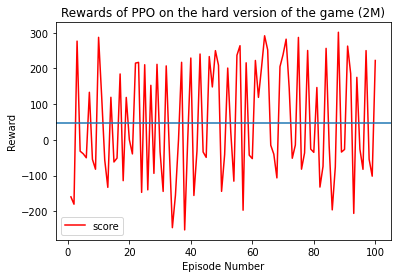

In [14]:
import matplotlib.pyplot as plt
import numpy as np
df.plot(x='episode', y='score', kind='line', color="r")
plt.axhline(y=np.nanmean(df.score))
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.title("Rewards of PPO on the hard version of the game (2M)")
plt.show()

# 6. Training DQN

In [18]:
from stable_baselines3 import DQN
log_path = os.path.join('Training', 'Logs')

In [19]:
log_path

'Training/Logs'

In [20]:
#Instantiating the environment with the adversarial conditions
env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )

"""
Vectorizing the environment so that the neural network is fed with batches of vectors from game
episodes instead of one episode at a time
"""
env = DummyVecEnv([lambda: Monitor(env, log_path)])

"""
Instantiating the RL algorithm, with Multi layer perceptron as a function approximator.
Training metrics are saved to the log_path file: Logs
"""

model2 = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [21]:
#Training the model for 2 Million timestep.
model2.learn(total_timesteps=2000000)

Logging to Training/Logs/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.2     |
|    ep_rew_mean      | -273     |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1596     |
|    time_elapsed     | 0        |
|    total_timesteps  | 289      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.2     |
|    ep_rew_mean      | -240     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1799     |
|    time_elapsed     | 0        |
|    total_timesteps  | 570      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.1     |
|    ep_rew_mean      | -299     |
|    exploration_rate | 0.995    |
| time/               | 

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.5     |
|    ep_rew_mean      | -290     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 2143     |
|    time_elapsed     | 3        |
|    total_timesteps  | 8049     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.9     |
|    ep_rew_mean      | -291     |
|    exploration_rate | 0.96     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 2141     |
|    time_elapsed     | 3        |
|    total_timesteps  | 8341     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.7     |
|    ep_rew_mean      | -295     |
|    exploration_rate | 0.958    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.9     |
|    ep_rew_mean      | -305     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 2017     |
|    time_elapsed     | 7        |
|    total_timesteps  | 15676    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.3     |
|    ep_rew_mean      | -301     |
|    exploration_rate | 0.924    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 2016     |
|    time_elapsed     | 7        |
|    total_timesteps  | 15966    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.6     |
|    ep_rew_mean      | -309     |
|    exploration_rate | 0.923    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85       |
|    ep_rew_mean      | -311     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 2077     |
|    time_elapsed     | 11       |
|    total_timesteps  | 23185    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.2     |
|    ep_rew_mean      | -308     |
|    exploration_rate | 0.888    |
| time/               |          |
|    episodes         | 272      |
|    fps              | 2087     |
|    time_elapsed     | 11       |
|    total_timesteps  | 23550    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.8     |
|    ep_rew_mean      | -304     |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.3     |
|    ep_rew_mean      | -315     |
|    exploration_rate | 0.853    |
| time/               |          |
|    episodes         | 356      |
|    fps              | 2186     |
|    time_elapsed     | 14       |
|    total_timesteps  | 30851    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.9     |
|    ep_rew_mean      | -315     |
|    exploration_rate | 0.852    |
| time/               |          |
|    episodes         | 360      |
|    fps              | 2180     |
|    time_elapsed     | 14       |
|    total_timesteps  | 31249    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.6     |
|    ep_rew_mean      | -314     |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | -319     |
|    exploration_rate | 0.816    |
| time/               |          |
|    episodes         | 444      |
|    fps              | 2154     |
|    time_elapsed     | 17       |
|    total_timesteps  | 38662    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.5     |
|    ep_rew_mean      | -320     |
|    exploration_rate | 0.814    |
| time/               |          |
|    episodes         | 448      |
|    fps              | 2159     |
|    time_elapsed     | 18       |
|    total_timesteps  | 39093    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.2     |
|    ep_rew_mean      | -323     |
|    exploration_rate | 0.813    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.8     |
|    ep_rew_mean      | -325     |
|    exploration_rate | 0.779    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 2144     |
|    time_elapsed     | 21       |
|    total_timesteps  | 46473    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | -329     |
|    exploration_rate | 0.778    |
| time/               |          |
|    episodes         | 536      |
|    fps              | 2138     |
|    time_elapsed     | 21       |
|    total_timesteps  | 46793    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.9     |
|    ep_rew_mean      | -330     |
|    exploration_rate | 0.776    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.7     |
|    ep_rew_mean      | -345     |
|    exploration_rate | 0.746    |
| time/               |          |
|    episodes         | 608      |
|    fps              | 1954     |
|    time_elapsed     | 27       |
|    total_timesteps  | 53460    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.64     |
|    n_updates        | 864      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | -345     |
|    exploration_rate | 0.744    |
| time/               |          |
|    episodes         | 612      |
|    fps              | 1941     |
|    time_elapsed     | 27       |
|    total_timesteps  | 53868    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | -323     |
|    exploration_rate | 0.714    |
| time/               |          |
|    episodes         | 672      |
|    fps              | 1744     |
|    time_elapsed     | 34       |
|    total_timesteps  | 60208    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates        | 2551     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -320     |
|    exploration_rate | 0.712    |
| time/               |          |
|    episodes         | 676      |
|    fps              | 1735     |
|    time_elapsed     | 34       |
|    total_timesteps  | 60596    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | -253     |
|    exploration_rate | 0.682    |
| time/               |          |
|    episodes         | 736      |
|    fps              | 1555     |
|    time_elapsed     | 42       |
|    total_timesteps  | 66879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.66     |
|    n_updates        | 4219     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 106      |
|    ep_rew_mean      | -256     |
|    exploration_rate | 0.68     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 1548     |
|    time_elapsed     | 43       |
|    total_timesteps  | 67334    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2        |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | -257     |
|    exploration_rate | 0.647    |
| time/               |          |
|    episodes         | 800      |
|    fps              | 1409     |
|    time_elapsed     | 52       |
|    total_timesteps  | 74258    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45     |
|    n_updates        | 6064     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | -259     |
|    exploration_rate | 0.645    |
| time/               |          |
|    episodes         | 804      |
|    fps              | 1402     |
|    time_elapsed     | 53       |
|    total_timesteps  | 74652    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | -237     |
|    exploration_rate | 0.615    |
| time/               |          |
|    episodes         | 864      |
|    fps              | 1328     |
|    time_elapsed     | 61       |
|    total_timesteps  | 81043    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44     |
|    n_updates        | 7760     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | -233     |
|    exploration_rate | 0.613    |
| time/               |          |
|    episodes         | 868      |
|    fps              | 1325     |
|    time_elapsed     | 61       |
|    total_timesteps  | 81517    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.775    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 128      |
|    ep_rew_mean      | -207     |
|    exploration_rate | 0.572    |
| time/               |          |
|    episodes         | 928      |
|    fps              | 1205     |
|    time_elapsed     | 74       |
|    total_timesteps  | 90107    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22     |
|    n_updates        | 10026    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 129      |
|    ep_rew_mean      | -207     |
|    exploration_rate | 0.57     |
| time/               |          |
|    episodes         | 932      |
|    fps              | 1203     |
|    time_elapsed     | 75       |
|    total_timesteps  | 90614    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.846    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 149      |
|    ep_rew_mean      | -196     |
|    exploration_rate | 0.53     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 1164     |
|    time_elapsed     | 84       |
|    total_timesteps  | 98976    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13     |
|    n_updates        | 12243    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 149      |
|    ep_rew_mean      | -197     |
|    exploration_rate | 0.528    |
| time/               |          |
|    episodes         | 996      |
|    fps              | 1163     |
|    time_elapsed     | 85       |
|    total_timesteps  | 99447    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 146      |
|    ep_rew_mean      | -187     |
|    exploration_rate | 0.486    |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 1096     |
|    time_elapsed     | 98       |
|    total_timesteps  | 108305   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22     |
|    n_updates        | 14576    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | -183     |
|    exploration_rate | 0.483    |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 1095     |
|    time_elapsed     | 99       |
|    total_timesteps  | 108883   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.276    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 150      |
|    ep_rew_mean      | -173     |
|    exploration_rate | 0.438    |
| time/               |          |
|    episodes         | 1120     |
|    fps              | 1061     |
|    time_elapsed     | 111      |
|    total_timesteps  | 118409   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.758    |
|    n_updates        | 17102    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 161      |
|    ep_rew_mean      | -171     |
|    exploration_rate | 0.43     |
| time/               |          |
|    episodes         | 1124     |
|    fps              | 1050     |
|    time_elapsed     | 114      |
|    total_timesteps  | 119966   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 184      |
|    ep_rew_mean      | -146     |
|    exploration_rate | 0.381    |
| time/               |          |
|    episodes         | 1184     |
|    fps              | 1028     |
|    time_elapsed     | 126      |
|    total_timesteps  | 130248   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.935    |
|    n_updates        | 20061    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 185      |
|    ep_rew_mean      | -148     |
|    exploration_rate | 0.379    |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 1028     |
|    time_elapsed     | 127      |
|    total_timesteps  | 130756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 179      |
|    ep_rew_mean      | -131     |
|    exploration_rate | 0.329    |
| time/               |          |
|    episodes         | 1248     |
|    fps              | 1009     |
|    time_elapsed     | 139      |
|    total_timesteps  | 141224   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.12     |
|    n_updates        | 22805    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 172      |
|    ep_rew_mean      | -131     |
|    exploration_rate | 0.326    |
| time/               |          |
|    episodes         | 1252     |
|    fps              | 1008     |
|    time_elapsed     | 140      |
|    total_timesteps  | 141897   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.845    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 191      |
|    ep_rew_mean      | -96      |
|    exploration_rate | 0.267    |
| time/               |          |
|    episodes         | 1312     |
|    fps              | 975      |
|    time_elapsed     | 158      |
|    total_timesteps  | 154276   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.728    |
|    n_updates        | 26068    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 194      |
|    ep_rew_mean      | -93.4    |
|    exploration_rate | 0.263    |
| time/               |          |
|    episodes         | 1316     |
|    fps              | 974      |
|    time_elapsed     | 159      |
|    total_timesteps  | 155203   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.842    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 225      |
|    ep_rew_mean      | -91.3    |
|    exploration_rate | 0.198    |
| time/               |          |
|    episodes         | 1376     |
|    fps              | 954      |
|    time_elapsed     | 176      |
|    total_timesteps  | 168910   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.621    |
|    n_updates        | 29727    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 228      |
|    ep_rew_mean      | -90      |
|    exploration_rate | 0.191    |
| time/               |          |
|    episodes         | 1380     |
|    fps              | 952      |
|    time_elapsed     | 178      |
|    total_timesteps  | 170211   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 293      |
|    ep_rew_mean      | -92.2    |
|    exploration_rate | 0.0984   |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 915      |
|    time_elapsed     | 207      |
|    total_timesteps  | 189821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.51     |
|    n_updates        | 34955    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 302      |
|    ep_rew_mean      | -95.2    |
|    exploration_rate | 0.0914   |
| time/               |          |
|    episodes         | 1444     |
|    fps              | 913      |
|    time_elapsed     | 209      |
|    total_timesteps  | 191292   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 433      |
|    ep_rew_mean      | -144     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 846      |
|    time_elapsed     | 261      |
|    total_timesteps  | 221210   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.704    |
|    n_updates        | 42802    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 442      |
|    ep_rew_mean      | -150     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1508     |
|    fps              | 843      |
|    time_elapsed     | 264      |
|    total_timesteps  | 223201   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 476      |
|    ep_rew_mean      | -169     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1568     |
|    fps              | 804      |
|    time_elapsed     | 312      |
|    total_timesteps  | 251184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.38     |
|    n_updates        | 50295    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 467      |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1572     |
|    fps              | 803      |
|    time_elapsed     | 314      |
|    total_timesteps  | 252556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.649    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 444      |
|    ep_rew_mean      | -208     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1632     |
|    fps              | 770      |
|    time_elapsed     | 362      |
|    total_timesteps  | 279459   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.84     |
|    n_updates        | 57364    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 445      |
|    ep_rew_mean      | -206     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1636     |
|    fps              | 769      |
|    time_elapsed     | 365      |
|    total_timesteps  | 281057   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.993    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 411      |
|    ep_rew_mean      | -184     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 753      |
|    time_elapsed     | 403      |
|    total_timesteps  | 304304   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.77     |
|    n_updates        | 63575    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 397      |
|    ep_rew_mean      | -177     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1700     |
|    fps              | 753      |
|    time_elapsed     | 404      |
|    total_timesteps  | 304975   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 341      |
|    ep_rew_mean      | -137     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 744      |
|    time_elapsed     | 438      |
|    total_timesteps  | 326020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72     |
|    n_updates        | 69004    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 343      |
|    ep_rew_mean      | -135     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 743      |
|    time_elapsed     | 440      |
|    total_timesteps  | 327648   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 295      |
|    ep_rew_mean      | -126     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1824     |
|    fps              | 738      |
|    time_elapsed     | 465      |
|    total_timesteps  | 343590   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.692    |
|    n_updates        | 73397    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 292      |
|    ep_rew_mean      | -125     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1828     |
|    fps              | 738      |
|    time_elapsed     | 466      |
|    total_timesteps  | 344777   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 244      |
|    ep_rew_mean      | -132     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1888     |
|    fps              | 736      |
|    time_elapsed     | 487      |
|    total_timesteps  | 359213   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates        | 77303    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 243      |
|    ep_rew_mean      | -130     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1892     |
|    fps              | 736      |
|    time_elapsed     | 489      |
|    total_timesteps  | 360319   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.831    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 263      |
|    ep_rew_mean      | -87.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1952     |
|    fps              | 734      |
|    time_elapsed     | 513      |
|    total_timesteps  | 376850   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.851    |
|    n_updates        | 81712    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 261      |
|    ep_rew_mean      | -85.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1956     |
|    fps              | 734      |
|    time_elapsed     | 514      |
|    total_timesteps  | 377715   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.782    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 237      |
|    ep_rew_mean      | -73.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2016     |
|    fps              | 730      |
|    time_elapsed     | 535      |
|    total_timesteps  | 391287   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.987    |
|    n_updates        | 85321    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 231      |
|    ep_rew_mean      | -73.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2020     |
|    fps              | 731      |
|    time_elapsed     | 535      |
|    total_timesteps  | 391800   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 217      |
|    ep_rew_mean      | -76.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2080     |
|    fps              | 730      |
|    time_elapsed     | 553      |
|    total_timesteps  | 404180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48     |
|    n_updates        | 88544    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 210      |
|    ep_rew_mean      | -78.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2084     |
|    fps              | 730      |
|    time_elapsed     | 553      |
|    total_timesteps  | 404778   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 205      |
|    ep_rew_mean      | -64.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2144     |
|    fps              | 729      |
|    time_elapsed     | 571      |
|    total_timesteps  | 417114   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26     |
|    n_updates        | 91778    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -70.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 729      |
|    time_elapsed     | 572      |
|    total_timesteps  | 417636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -77.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 730      |
|    time_elapsed     | 587      |
|    total_timesteps  | 429161   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.24     |
|    n_updates        | 94790    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 189      |
|    ep_rew_mean      | -79.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2212     |
|    fps              | 730      |
|    time_elapsed     | 588      |
|    total_timesteps  | 429923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.788    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 199      |
|    ep_rew_mean      | -65.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2272     |
|    fps              | 729      |
|    time_elapsed     | 607      |
|    total_timesteps  | 442772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates        | 98192    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 199      |
|    ep_rew_mean      | -63.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2276     |
|    fps              | 729      |
|    time_elapsed     | 607      |
|    total_timesteps  | 443258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 196      |
|    ep_rew_mean      | -63.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2336     |
|    fps              | 729      |
|    time_elapsed     | 624      |
|    total_timesteps  | 455752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates        | 101437   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -69.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2340     |
|    fps              | 729      |
|    time_elapsed     | 626      |
|    total_timesteps  | 456667   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 196      |
|    ep_rew_mean      | -69.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2400     |
|    fps              | 726      |
|    time_elapsed     | 644      |
|    total_timesteps  | 467949   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates        | 104487   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 194      |
|    ep_rew_mean      | -71.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 726      |
|    time_elapsed     | 644      |
|    total_timesteps  | 468657   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 195      |
|    ep_rew_mean      | -82.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2464     |
|    fps              | 726      |
|    time_elapsed     | 661      |
|    total_timesteps  | 480265   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05     |
|    n_updates        | 107566   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 195      |
|    ep_rew_mean      | -83.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2468     |
|    fps              | 726      |
|    time_elapsed     | 661      |
|    total_timesteps  | 480973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -91.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 726      |
|    time_elapsed     | 678      |
|    total_timesteps  | 493158   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.766    |
|    n_updates        | 110789   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -87.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2532     |
|    fps              | 726      |
|    time_elapsed     | 679      |
|    total_timesteps  | 493809   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 209      |
|    ep_rew_mean      | -83.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2592     |
|    fps              | 726      |
|    time_elapsed     | 697      |
|    total_timesteps  | 506602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.737    |
|    n_updates        | 114150   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 203      |
|    ep_rew_mean      | -87.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2596     |
|    fps              | 726      |
|    time_elapsed     | 697      |
|    total_timesteps  | 507162   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.764    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 203      |
|    ep_rew_mean      | -102     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2656     |
|    fps              | 726      |
|    time_elapsed     | 716      |
|    total_timesteps  | 520294   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.19     |
|    n_updates        | 117573   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 210      |
|    ep_rew_mean      | -104     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2660     |
|    fps              | 725      |
|    time_elapsed     | 719      |
|    total_timesteps  | 521740   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 225      |
|    ep_rew_mean      | -108     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2720     |
|    fps              | 725      |
|    time_elapsed     | 736      |
|    total_timesteps  | 534509   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.33     |
|    n_updates        | 121127   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 222      |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2724     |
|    fps              | 725      |
|    time_elapsed     | 737      |
|    total_timesteps  | 535145   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 205      |
|    ep_rew_mean      | -81.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2784     |
|    fps              | 726      |
|    time_elapsed     | 753      |
|    total_timesteps  | 546901   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.19     |
|    n_updates        | 124225   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 205      |
|    ep_rew_mean      | -82.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2788     |
|    fps              | 726      |
|    time_elapsed     | 754      |
|    total_timesteps  | 547869   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -97.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2848     |
|    fps              | 726      |
|    time_elapsed     | 769      |
|    total_timesteps  | 558902   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.739    |
|    n_updates        | 127225   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -100     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2852     |
|    fps              | 726      |
|    time_elapsed     | 770      |
|    total_timesteps  | 559574   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.6     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -104     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2912     |
|    fps              | 726      |
|    time_elapsed     | 784      |
|    total_timesteps  | 569869   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21     |
|    n_updates        | 129967   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 178      |
|    ep_rew_mean      | -101     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2916     |
|    fps              | 726      |
|    time_elapsed     | 784      |
|    total_timesteps  | 570494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 199      |
|    ep_rew_mean      | -95.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2976     |
|    fps              | 726      |
|    time_elapsed     | 802      |
|    total_timesteps  | 583370   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97     |
|    n_updates        | 133342   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -91.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2980     |
|    fps              | 727      |
|    time_elapsed     | 803      |
|    total_timesteps  | 583857   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 195      |
|    ep_rew_mean      | -120     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3040     |
|    fps              | 727      |
|    time_elapsed     | 817      |
|    total_timesteps  | 595214   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.925    |
|    n_updates        | 136303   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 196      |
|    ep_rew_mean      | -119     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3044     |
|    fps              | 727      |
|    time_elapsed     | 818      |
|    total_timesteps  | 595978   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.964    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 222      |
|    ep_rew_mean      | -100     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 727      |
|    time_elapsed     | 839      |
|    total_timesteps  | 610875   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.985    |
|    n_updates        | 140218   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 231      |
|    ep_rew_mean      | -104     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3108     |
|    fps              | 727      |
|    time_elapsed     | 842      |
|    total_timesteps  | 612450   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.919    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 235      |
|    ep_rew_mean      | -90.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3168     |
|    fps              | 727      |
|    time_elapsed     | 859      |
|    total_timesteps  | 625507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17     |
|    n_updates        | 143876   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 237      |
|    ep_rew_mean      | -93.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3172     |
|    fps              | 727      |
|    time_elapsed     | 860      |
|    total_timesteps  | 626555   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.54     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 203      |
|    ep_rew_mean      | -88.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3232     |
|    fps              | 728      |
|    time_elapsed     | 876      |
|    total_timesteps  | 638219   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.791    |
|    n_updates        | 147054   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 202      |
|    ep_rew_mean      | -91.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3236     |
|    fps              | 728      |
|    time_elapsed     | 878      |
|    total_timesteps  | 639386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.85     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 209      |
|    ep_rew_mean      | -82.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3296     |
|    fps              | 728      |
|    time_elapsed     | 895      |
|    total_timesteps  | 652457   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates        | 150614   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 211      |
|    ep_rew_mean      | -75.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3300     |
|    fps              | 728      |
|    time_elapsed     | 897      |
|    total_timesteps  | 653438   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 207      |
|    ep_rew_mean      | -89.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3360     |
|    fps              | 729      |
|    time_elapsed     | 911      |
|    total_timesteps  | 664759   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.35     |
|    n_updates        | 153689   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 203      |
|    ep_rew_mean      | -94.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3364     |
|    fps              | 729      |
|    time_elapsed     | 912      |
|    total_timesteps  | 665218   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 193      |
|    ep_rew_mean      | -124     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3424     |
|    fps              | 729      |
|    time_elapsed     | 928      |
|    total_timesteps  | 677556   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.56     |
|    n_updates        | 156888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 190      |
|    ep_rew_mean      | -123     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3428     |
|    fps              | 729      |
|    time_elapsed     | 929      |
|    total_timesteps  | 678157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 202      |
|    ep_rew_mean      | -123     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3488     |
|    fps              | 728      |
|    time_elapsed     | 946      |
|    total_timesteps  | 689530   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates        | 159882   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 213      |
|    ep_rew_mean      | -128     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3492     |
|    fps              | 726      |
|    time_elapsed     | 951      |
|    total_timesteps  | 691308   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 215      |
|    ep_rew_mean      | -123     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3552     |
|    fps              | 725      |
|    time_elapsed     | 970      |
|    total_timesteps  | 704090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 163522   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 214      |
|    ep_rew_mean      | -125     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3556     |
|    fps              | 725      |
|    time_elapsed     | 971      |
|    total_timesteps  | 704789   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 221      |
|    ep_rew_mean      | -105     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3616     |
|    fps              | 725      |
|    time_elapsed     | 989      |
|    total_timesteps  | 718082   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.798    |
|    n_updates        | 167020   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 215      |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3620     |
|    fps              | 725      |
|    time_elapsed     | 990      |
|    total_timesteps  | 718805   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 226      |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3680     |
|    fps              | 726      |
|    time_elapsed     | 1009     |
|    total_timesteps  | 733075   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.23     |
|    n_updates        | 170768   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 225      |
|    ep_rew_mean      | -114     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3684     |
|    fps              | 725      |
|    time_elapsed     | 1011     |
|    total_timesteps  | 734040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.83     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 214      |
|    ep_rew_mean      | -112     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3744     |
|    fps              | 725      |
|    time_elapsed     | 1029     |
|    total_timesteps  | 746646   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.93     |
|    n_updates        | 174161   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 215      |
|    ep_rew_mean      | -115     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3748     |
|    fps              | 725      |
|    time_elapsed     | 1030     |
|    total_timesteps  | 747388   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.17     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | -98.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3808     |
|    fps              | 725      |
|    time_elapsed     | 1046     |
|    total_timesteps  | 759923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.03     |
|    n_updates        | 177480   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 205      |
|    ep_rew_mean      | -100     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3812     |
|    fps              | 725      |
|    time_elapsed     | 1047     |
|    total_timesteps  | 760756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 253      |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3872     |
|    fps              | 724      |
|    time_elapsed     | 1073     |
|    total_timesteps  | 777909   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 181977   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 251      |
|    ep_rew_mean      | -99.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3876     |
|    fps              | 724      |
|    time_elapsed     | 1073     |
|    total_timesteps  | 778606   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 265      |
|    ep_rew_mean      | -126     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3936     |
|    fps              | 724      |
|    time_elapsed     | 1093     |
|    total_timesteps  | 792468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.54     |
|    n_updates        | 185616   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 263      |
|    ep_rew_mean      | -130     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3940     |
|    fps              | 724      |
|    time_elapsed     | 1095     |
|    total_timesteps  | 793364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 239      |
|    ep_rew_mean      | -133     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4000     |
|    fps              | 724      |
|    time_elapsed     | 1115     |
|    total_timesteps  | 807848   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.93     |
|    n_updates        | 189461   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 234      |
|    ep_rew_mean      | -129     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4004     |
|    fps              | 724      |
|    time_elapsed     | 1116     |
|    total_timesteps  | 808632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 268      |
|    ep_rew_mean      | -134     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4064     |
|    fps              | 723      |
|    time_elapsed     | 1142     |
|    total_timesteps  | 825882   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.953    |
|    n_updates        | 193970   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 268      |
|    ep_rew_mean      | -129     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4068     |
|    fps              | 723      |
|    time_elapsed     | 1143     |
|    total_timesteps  | 826780   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.858    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 298      |
|    ep_rew_mean      | -138     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4128     |
|    fps              | 719      |
|    time_elapsed     | 1175     |
|    total_timesteps  | 845970   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.22     |
|    n_updates        | 198992   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 297      |
|    ep_rew_mean      | -133     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4132     |
|    fps              | 719      |
|    time_elapsed     | 1176     |
|    total_timesteps  | 846989   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.94     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 305      |
|    ep_rew_mean      | -116     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4192     |
|    fps              | 718      |
|    time_elapsed     | 1202     |
|    total_timesteps  | 864586   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.97     |
|    n_updates        | 203646   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | -118     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4196     |
|    fps              | 718      |
|    time_elapsed     | 1205     |
|    total_timesteps  | 866377   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 313      |
|    ep_rew_mean      | -129     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4256     |
|    fps              | 716      |
|    time_elapsed     | 1236     |
|    total_timesteps  | 885644   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59     |
|    n_updates        | 208910   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 322      |
|    ep_rew_mean      | -136     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4260     |
|    fps              | 716      |
|    time_elapsed     | 1239     |
|    total_timesteps  | 887384   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.766    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -123     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 713      |
|    time_elapsed     | 1268     |
|    total_timesteps  | 904816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.27     |
|    n_updates        | 213703   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 295      |
|    ep_rew_mean      | -121     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4324     |
|    fps              | 713      |
|    time_elapsed     | 1269     |
|    total_timesteps  | 905654   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 288      |
|    ep_rew_mean      | -108     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4384     |
|    fps              | 711      |
|    time_elapsed     | 1296     |
|    total_timesteps  | 923281   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65     |
|    n_updates        | 218320   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 286      |
|    ep_rew_mean      | -110     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4388     |
|    fps              | 711      |
|    time_elapsed     | 1298     |
|    total_timesteps  | 924548   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 298      |
|    ep_rew_mean      | -121     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4448     |
|    fps              | 711      |
|    time_elapsed     | 1324     |
|    total_timesteps  | 942217   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37     |
|    n_updates        | 223054   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 290      |
|    ep_rew_mean      | -117     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4452     |
|    fps              | 711      |
|    time_elapsed     | 1325     |
|    total_timesteps  | 943130   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 321      |
|    ep_rew_mean      | -128     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4512     |
|    fps              | 709      |
|    time_elapsed     | 1356     |
|    total_timesteps  | 962809   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63     |
|    n_updates        | 228202   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 321      |
|    ep_rew_mean      | -131     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4516     |
|    fps              | 709      |
|    time_elapsed     | 1358     |
|    total_timesteps  | 964216   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 332      |
|    ep_rew_mean      | -138     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4576     |
|    fps              | 707      |
|    time_elapsed     | 1391     |
|    total_timesteps  | 983990   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.21     |
|    n_updates        | 233497   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 331      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4580     |
|    fps              | 707      |
|    time_elapsed     | 1392     |
|    total_timesteps  | 985230   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 335      |
|    ep_rew_mean      | -130     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4640     |
|    fps              | 705      |
|    time_elapsed     | 1425     |
|    total_timesteps  | 1006056  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1      |
|    n_updates        | 239013   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 340      |
|    ep_rew_mean      | -133     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4644     |
|    fps              | 705      |
|    time_elapsed     | 1427     |
|    total_timesteps  | 1007486  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.5      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 332      |
|    ep_rew_mean      | -112     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4704     |
|    fps              | 704      |
|    time_elapsed     | 1458     |
|    total_timesteps  | 1027602  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.47     |
|    n_updates        | 244400   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 330      |
|    ep_rew_mean      | -112     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4708     |
|    fps              | 704      |
|    time_elapsed     | 1460     |
|    total_timesteps  | 1029019  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.952    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 354      |
|    ep_rew_mean      | -109     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4768     |
|    fps              | 702      |
|    time_elapsed     | 1496     |
|    total_timesteps  | 1050736  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 250183   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 353      |
|    ep_rew_mean      | -108     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4772     |
|    fps              | 702      |
|    time_elapsed     | 1498     |
|    total_timesteps  | 1052058  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 358      |
|    ep_rew_mean      | -95.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4832     |
|    fps              | 699      |
|    time_elapsed     | 1534     |
|    total_timesteps  | 1073600  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.633    |
|    n_updates        | 255899   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 347      |
|    ep_rew_mean      | -95.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4836     |
|    fps              | 699      |
|    time_elapsed     | 1535     |
|    total_timesteps  | 1074564  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 383      |
|    ep_rew_mean      | -87.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4896     |
|    fps              | 696      |
|    time_elapsed     | 1578     |
|    total_timesteps  | 1099234  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.68     |
|    n_updates        | 262308   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 377      |
|    ep_rew_mean      | -83.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4900     |
|    fps              | 696      |
|    time_elapsed     | 1579     |
|    total_timesteps  | 1099989  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.877    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 454      |
|    ep_rew_mean      | -56.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4960     |
|    fps              | 689      |
|    time_elapsed     | 1636     |
|    total_timesteps  | 1129323  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates        | 269830   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 442      |
|    ep_rew_mean      | -55.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4964     |
|    fps              | 690      |
|    time_elapsed     | 1638     |
|    total_timesteps  | 1130302  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 437      |
|    ep_rew_mean      | -66.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5024     |
|    fps              | 686      |
|    time_elapsed     | 1686     |
|    total_timesteps  | 1157553  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46     |
|    n_updates        | 276888   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 449      |
|    ep_rew_mean      | -68.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5028     |
|    fps              | 685      |
|    time_elapsed     | 1692     |
|    total_timesteps  | 1159797  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 464      |
|    ep_rew_mean      | -64.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5088     |
|    fps              | 680      |
|    time_elapsed     | 1745     |
|    total_timesteps  | 1188905  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09     |
|    n_updates        | 284726   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 472      |
|    ep_rew_mean      | -60.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5092     |
|    fps              | 680      |
|    time_elapsed     | 1751     |
|    total_timesteps  | 1191268  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | -69.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5152     |
|    fps              | 675      |
|    time_elapsed     | 1807     |
|    total_timesteps  | 1221381  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 292845   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | -63.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5156     |
|    fps              | 675      |
|    time_elapsed     | 1810     |
|    total_timesteps  | 1222962  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 517      |
|    ep_rew_mean      | -45.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5216     |
|    fps              | 670      |
|    time_elapsed     | 1872     |
|    total_timesteps  | 1254998  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 301249   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 520      |
|    ep_rew_mean      | -46      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5220     |
|    fps              | 669      |
|    time_elapsed     | 1876     |
|    total_timesteps  | 1256981  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 460      |
|    ep_rew_mean      | -34.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5280     |
|    fps              | 666      |
|    time_elapsed     | 1924     |
|    total_timesteps  | 1282253  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5      |
|    n_updates        | 308063   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 447      |
|    ep_rew_mean      | -34.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5284     |
|    fps              | 666      |
|    time_elapsed     | 1925     |
|    total_timesteps  | 1283287  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 431      |
|    ep_rew_mean      | -42.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5344     |
|    fps              | 662      |
|    time_elapsed     | 1978     |
|    total_timesteps  | 1311334  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates        | 315333   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 435      |
|    ep_rew_mean      | -36.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5348     |
|    fps              | 662      |
|    time_elapsed     | 1982     |
|    total_timesteps  | 1313601  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.66     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 431      |
|    ep_rew_mean      | -39.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5408     |
|    fps              | 659      |
|    time_elapsed     | 2034     |
|    total_timesteps  | 1341361  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates        | 322840   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 425      |
|    ep_rew_mean      | -39.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5412     |
|    fps              | 659      |
|    time_elapsed     | 2036     |
|    total_timesteps  | 1342643  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 456      |
|    ep_rew_mean      | -27.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5472     |
|    fps              | 657      |
|    time_elapsed     | 2084     |
|    total_timesteps  | 1370106  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.7      |
|    n_updates        | 330026   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 465      |
|    ep_rew_mean      | -29.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5476     |
|    fps              | 656      |
|    time_elapsed     | 2088     |
|    total_timesteps  | 1371867  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 434      |
|    ep_rew_mean      | -40.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5536     |
|    fps              | 653      |
|    time_elapsed     | 2139     |
|    total_timesteps  | 1397202  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.79     |
|    n_updates        | 336800   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 420      |
|    ep_rew_mean      | -45.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5540     |
|    fps              | 653      |
|    time_elapsed     | 2141     |
|    total_timesteps  | 1398467  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 402      |
|    ep_rew_mean      | -44.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5600     |
|    fps              | 651      |
|    time_elapsed     | 2183     |
|    total_timesteps  | 1422848  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08     |
|    n_updates        | 343211   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 415      |
|    ep_rew_mean      | -47      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5604     |
|    fps              | 651      |
|    time_elapsed     | 2187     |
|    total_timesteps  | 1425364  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 446      |
|    ep_rew_mean      | -67.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5664     |
|    fps              | 649      |
|    time_elapsed     | 2236     |
|    total_timesteps  | 1452727  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25     |
|    n_updates        | 350681   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 429      |
|    ep_rew_mean      | -62.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5668     |
|    fps              | 649      |
|    time_elapsed     | 2237     |
|    total_timesteps  | 1453740  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 423      |
|    ep_rew_mean      | -91.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5728     |
|    fps              | 647      |
|    time_elapsed     | 2281     |
|    total_timesteps  | 1477582  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.39     |
|    n_updates        | 356895   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 418      |
|    ep_rew_mean      | -97.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5732     |
|    fps              | 647      |
|    time_elapsed     | 2284     |
|    total_timesteps  | 1479386  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 389      |
|    ep_rew_mean      | -86.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5792     |
|    fps              | 646      |
|    time_elapsed     | 2323     |
|    total_timesteps  | 1503169  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28     |
|    n_updates        | 363292   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 389      |
|    ep_rew_mean      | -84.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5796     |
|    fps              | 646      |
|    time_elapsed     | 2325     |
|    total_timesteps  | 1504613  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.87     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 404      |
|    ep_rew_mean      | -106     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5856     |
|    fps              | 646      |
|    time_elapsed     | 2366     |
|    total_timesteps  | 1529282  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates        | 369820   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 419      |
|    ep_rew_mean      | -108     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5860     |
|    fps              | 645      |
|    time_elapsed     | 2371     |
|    total_timesteps  | 1531961  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 433      |
|    ep_rew_mean      | -111     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5920     |
|    fps              | 644      |
|    time_elapsed     | 2416     |
|    total_timesteps  | 1556993  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 376748   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 423      |
|    ep_rew_mean      | -107     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5924     |
|    fps              | 644      |
|    time_elapsed     | 2417     |
|    total_timesteps  | 1558129  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 379      |
|    ep_rew_mean      | -104     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5984     |
|    fps              | 644      |
|    time_elapsed     | 2450     |
|    total_timesteps  | 1579071  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4      |
|    n_updates        | 382267   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 374      |
|    ep_rew_mean      | -102     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5988     |
|    fps              | 644      |
|    time_elapsed     | 2452     |
|    total_timesteps  | 1580255  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.824    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 361      |
|    ep_rew_mean      | -85.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6048     |
|    fps              | 643      |
|    time_elapsed     | 2487     |
|    total_timesteps  | 1601895  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.942    |
|    n_updates        | 387973   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 360      |
|    ep_rew_mean      | -84.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6052     |
|    fps              | 644      |
|    time_elapsed     | 2489     |
|    total_timesteps  | 1603435  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 349      |
|    ep_rew_mean      | -71      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6112     |
|    fps              | 644      |
|    time_elapsed     | 2521     |
|    total_timesteps  | 1624082  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.72     |
|    n_updates        | 393520   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 345      |
|    ep_rew_mean      | -77.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6116     |
|    fps              | 644      |
|    time_elapsed     | 2523     |
|    total_timesteps  | 1625196  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 354      |
|    ep_rew_mean      | -96.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6176     |
|    fps              | 643      |
|    time_elapsed     | 2559     |
|    total_timesteps  | 1646841  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.79     |
|    n_updates        | 399210   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 356      |
|    ep_rew_mean      | -103     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6180     |
|    fps              | 643      |
|    time_elapsed     | 2561     |
|    total_timesteps  | 1648157  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 316      |
|    ep_rew_mean      | -93.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6240     |
|    fps              | 642      |
|    time_elapsed     | 2592     |
|    total_timesteps  | 1666339  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82     |
|    n_updates        | 404084   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 314      |
|    ep_rew_mean      | -97.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6244     |
|    fps              | 642      |
|    time_elapsed     | 2593     |
|    total_timesteps  | 1667432  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 304      |
|    ep_rew_mean      | -93.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6304     |
|    fps              | 643      |
|    time_elapsed     | 2620     |
|    total_timesteps  | 1684850  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates        | 408712   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 299      |
|    ep_rew_mean      | -86.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6308     |
|    fps              | 643      |
|    time_elapsed     | 2622     |
|    total_timesteps  | 1686242  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 347      |
|    ep_rew_mean      | -84.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6368     |
|    fps              | 642      |
|    time_elapsed     | 2661     |
|    total_timesteps  | 1709233  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03     |
|    n_updates        | 414808   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 351      |
|    ep_rew_mean      | -82.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6372     |
|    fps              | 642      |
|    time_elapsed     | 2662     |
|    total_timesteps  | 1710533  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.16     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 306      |
|    ep_rew_mean      | -83.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6432     |
|    fps              | 642      |
|    time_elapsed     | 2688     |
|    total_timesteps  | 1727734  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85     |
|    n_updates        | 419433   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 310      |
|    ep_rew_mean      | -80.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6436     |
|    fps              | 642      |
|    time_elapsed     | 2691     |
|    total_timesteps  | 1729442  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.78     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 316      |
|    ep_rew_mean      | -82.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6496     |
|    fps              | 642      |
|    time_elapsed     | 2720     |
|    total_timesteps  | 1748666  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41     |
|    n_updates        | 424666   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 306      |
|    ep_rew_mean      | -83.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6500     |
|    fps              | 642      |
|    time_elapsed     | 2721     |
|    total_timesteps  | 1749380  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.985    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 295      |
|    ep_rew_mean      | -99.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6560     |
|    fps              | 643      |
|    time_elapsed     | 2747     |
|    total_timesteps  | 1767141  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41     |
|    n_updates        | 429285   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 298      |
|    ep_rew_mean      | -104     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6564     |
|    fps              | 643      |
|    time_elapsed     | 2748     |
|    total_timesteps  | 1768345  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 309      |
|    ep_rew_mean      | -99.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6624     |
|    fps              | 643      |
|    time_elapsed     | 2778     |
|    total_timesteps  | 1788100  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.74     |
|    n_updates        | 434524   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 312      |
|    ep_rew_mean      | -97.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6628     |
|    fps              | 643      |
|    time_elapsed     | 2781     |
|    total_timesteps  | 1789919  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 335      |
|    ep_rew_mean      | -81.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6688     |
|    fps              | 643      |
|    time_elapsed     | 2811     |
|    total_timesteps  | 1808783  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 439695   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 331      |
|    ep_rew_mean      | -78.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6692     |
|    fps              | 643      |
|    time_elapsed     | 2812     |
|    total_timesteps  | 1809776  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 318      |
|    ep_rew_mean      | -64.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6752     |
|    fps              | 643      |
|    time_elapsed     | 2844     |
|    total_timesteps  | 1829775  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.696    |
|    n_updates        | 444943   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 313      |
|    ep_rew_mean      | -65.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6756     |
|    fps              | 643      |
|    time_elapsed     | 2845     |
|    total_timesteps  | 1830898  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 346      |
|    ep_rew_mean      | -43.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6816     |
|    fps              | 643      |
|    time_elapsed     | 2877     |
|    total_timesteps  | 1851435  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates        | 450358   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 344      |
|    ep_rew_mean      | -50.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6820     |
|    fps              | 643      |
|    time_elapsed     | 2882     |
|    total_timesteps  | 1853452  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 327      |
|    ep_rew_mean      | -68.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6880     |
|    fps              | 640      |
|    time_elapsed     | 2921     |
|    total_timesteps  | 1871630  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.968    |
|    n_updates        | 455407   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 319      |
|    ep_rew_mean      | -73.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6884     |
|    fps              | 640      |
|    time_elapsed     | 2922     |
|    total_timesteps  | 1872656  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 301      |
|    ep_rew_mean      | -70.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6944     |
|    fps              | 641      |
|    time_elapsed     | 2949     |
|    total_timesteps  | 1891017  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 460254   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 304      |
|    ep_rew_mean      | -68.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6948     |
|    fps              | 641      |
|    time_elapsed     | 2951     |
|    total_timesteps  | 1892107  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 319      |
|    ep_rew_mean      | -62.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7008     |
|    fps              | 640      |
|    time_elapsed     | 2985     |
|    total_timesteps  | 1911849  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates        | 465462   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 324      |
|    ep_rew_mean      | -63.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7012     |
|    fps              | 640      |
|    time_elapsed     | 2989     |
|    total_timesteps  | 1913789  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 325      |
|    ep_rew_mean      | -41.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7072     |
|    fps              | 640      |
|    time_elapsed     | 3018     |
|    total_timesteps  | 1932265  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.41     |
|    n_updates        | 470566   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 325      |
|    ep_rew_mean      | -47.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7076     |
|    fps              | 640      |
|    time_elapsed     | 3020     |
|    total_timesteps  | 1933640  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 338      |
|    ep_rew_mean      | -25.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7136     |
|    fps              | 639      |
|    time_elapsed     | 3057     |
|    total_timesteps  | 1955493  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.664    |
|    n_updates        | 476373   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 339      |
|    ep_rew_mean      | -25.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7140     |
|    fps              | 639      |
|    time_elapsed     | 3059     |
|    total_timesteps  | 1956520  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 360      |
|    ep_rew_mean      | -58.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7200     |
|    fps              | 639      |
|    time_elapsed     | 3095     |
|    total_timesteps  | 1979101  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43     |
|    n_updates        | 482275   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 366      |
|    ep_rew_mean      | -55.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7204     |
|    fps              | 638      |
|    time_elapsed     | 3101     |
|    total_timesteps  | 1981353  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates      

# 7. Save and Reload Model

In [22]:
DQN_Path = os.path.join('Training', 'Saved Models', 'DQN_Model_LunarLander_Hard_2M')

In [23]:
model2.save(DQN_Path)

In [24]:
del model2

In [25]:
model2 = DQN.load(DQN_Path, env=env)

# 8.Testing the model

In [26]:
#Creating a CSV to save the results for plotting
import csv
with open('TestingResults/DQNhard2M.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    column = ["episode", "score"]
    writer.writerow(column)

In [27]:
with open('TestingResults/DQNhard2M.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )
    env = DummyVecEnv([lambda: Monitor(env, log_path)])
    #Testing for 100 episodes
    episodes = 100
    for episode in range(1, episodes+1):
        obs = env.reset()
        done = False
        score = 0
    
        while not done:
            env.render()
            #Using the trained model to obtain actions
            action, _ = model2.predict(obs)
            obs, reward, done, info = env.step(action)
            score += reward
        #saving each episode reward to the CSV file
        writer.writerow([episode,",".join(map(str, score))])
        print('Episode:{} Score:{}'.format(episode, score))

/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:208: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Episode:1 Score:[-89.248886]
Episode:2 Score:[202.15755]
Episode:3 Score:[-215.83289]
Episode:4 Score:[-158.28769]
Episode:5 Score:[-34.521187]
Episode:6 Score:[-28.096588]
Episode:7 Score:[-204.4576]
Episode:8 Score:[-128.50311]
Episode:9 Score:[-47.859306]
Episode:10 Score:[-304.346]
Episode:11 Score:[-143.84724]
Episode:12 Score:[-230.8555]
Episode:13 Score:[-186.55954]
Episode:14 Score:[18.444557]
Episode:15 Score:[-41.826363]
Episode:16 Score:[-108.884544]
Episode:17 Score:[-8.199074]
Episode:18 Score:[-239.1271]
Episode:19 Score:[-243.42444]
Episode:20 Score:[-311.36334]
Episode:21 Score:[-224.33704]
Episode:22 Score:[-271.60895]
Episode:23 Score:[-88.73946]
Episode:24 Score:[-71.36817]
Episode:25 Score:[181.47897]
Episode:26 Score:[-187.21509]
Episode:27 Score:[281.1911]
Episode:28 Score:[-82.04396]
Episode:29 Score:[-152.18657]
Episode:30 Score:[-26.626625]
Episode:31 Score:[-97.154785]
Episode:32 Score:[-212.27919]
Episode:33 Score:[-21.5317]
Episode:34 Score:[-91.02214]
Episo

# 9. Plotting the Results

In [29]:
df2 = pd.read_csv('TestingResults/DQNhard2M.csv')
print(df2)

    episode       score
0         1  -89.248886
1         2  202.157550
2         3 -215.832890
3         4 -158.287690
4         5  -34.521187
..      ...         ...
95       96  -92.850975
96       97  171.984860
97       98 -281.898130
98       99 -272.031000
99      100 -220.028210

[100 rows x 2 columns]


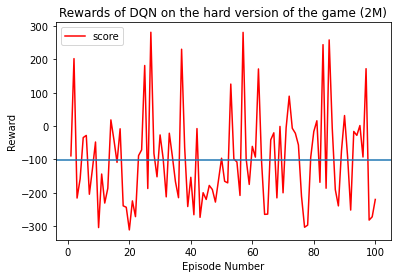

In [30]:
df2.plot(x='episode', y='score', kind='line', color="r")
plt.axhline(y=np.nanmean(df2.score))
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.title("Rewards of DQN on the hard version of the game (2M)")
plt.show()